You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

## Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle as pkl
from sklearn import linear_model
from itertools import combinations  
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import math
import statistics 
from scipy import stats as s
from sklearn.metrics import accuracy_score
from sklearn import metrics

x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

In [ ]:
#---------------------------------------- UTILITIES ----------------------------------------#

def save_to_pickle(arr, filename):
    with open(filename,'wb') as f:
        pkl.dump(arr, f)
     
def load_from_pickle(filename):
    arr = []
    with open(filename,'rb') as f:
        arr = pkl.load(f)
    return arr

## Data Handling & Train Test Split

In [ ]:
x = []
for row in x_l:
    temp = row.flatten()
    x.append(temp)

X = np.array(x)

def concatenate_ones(x):
    ones = np.ones(shape = x.shape[0]).reshape(-1,1)
    return np.concatenate((ones, x), 1)

X = concatenate_ones(X)
x_train, x_test, y_train, y_test = train_test_split(X, y_l, test_size=0.3, random_state=42)
print(x_train.shape)
print(y_train.shape)

(1443, 4097)
(1443, 10)


## Model Creation and Training

In [ ]:
m = x_train.shape[0]        #-----------------> No. of training data
n = x_train.shape[1]        #-----------------> No. of features
no_of_classes = y_train.shape[1]

## Code for One vs All 

In [ ]:
learning_rate = 0.01
epochs = 1500

def sigmoid(z):
    return 1 / (1 + np.exp(-(z)))


def hypothesis(weights, X):
    z = np.dot(X, weights)
    return sigmoid(z)


def compute_cost(x, y, weights):
    A = sigmoid(x.dot(weights))
    return -1/m*(np.dot(y.T,np.log(A))+(np.dot((1-y).T,np.log(1-A))))


def gradient_descent(X, y, weights, learning_rate, epochs):
    cost_history = np.zeros(epochs)

    for i in range(epochs):
        cost = compute_cost(X,y,weights)

        for j in range(no_of_classes):
            theta1 = weights[:,j]
            theta1 = theta1.reshape(-1,1)

            h = hypothesis(theta1, X)

            for k in range(n):
                theta2 = y[:,j]
                theta3 = X[:,k]
                theta2 = theta2.reshape(-1,1)
                theta3 = theta3.reshape(-1,1)
                weights[k][j] -= (learning_rate/m) * np.sum((h - theta2)*theta3)
        
        cost_history[i] = cost.mean()

    return weights, cost_history


#weights = np.zeros([n, no_of_classes])
#weights, cost_history = gradient_descent(x_train, y_train, weights, learning_rate, epochs)
#save_to_pickle(weights, "weights150.pkl")

### Predictions on Test Data

In [ ]:
weights = load_from_pickle("weights150.pkl")

predicted = []
for i in range(no_of_classes):
    theta = weights[:,i]
    theta = theta.reshape(-1,1)
    predicted.append(hypothesis(theta, x_test))

predicted = np.array(predicted)

### Accuracy, Classification report and Confusion matrix

In [ ]:
predicted = np.squeeze(predicted)
predicted = predicted.T
ypred = []

for row in predicted:
    ypred.append(np.argmax(row))

ypred = np.array(ypred)

yactual = []
for row in y_test:
    yactual.append(np.argmax(row))

yactual = np.array(yactual)
print("Accuracy of One vs Rest from scratch")
print("------------------------------------\n")
print(accuracy_score(yactual, ypred))

print()
print()
print("Classification report")
print("---------------------\n")
print(metrics.classification_report(yactual, ypred))
print()
print("\nConfusion matrix")
print("------------------\n")
matrix = confusion_matrix(yactual, ypred)
print(matrix)


Accuracy of One vs Rest from scratch
------------------------------------

0.7609046849757674


Classification report
---------------------

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        55
           1       0.86      0.86      0.86        70
           2       0.70      0.70      0.70        76
           3       0.69      0.75      0.72        63
           4       0.73      0.79      0.76        52
           5       0.71      0.73      0.72        55
           6       0.69      0.54      0.60        65
           7       0.88      0.82      0.85        62
           8       0.66      0.65      0.66        60
           9       0.87      0.89      0.88        61

    accuracy                           0.76       619
   macro avg       0.76      0.76      0.76       619
weighted avg       0.76      0.76      0.76       619



Confusion matrix
------------------

[[51  0  0  0  0  1  2  0  0  1]
 [ 1 60  0  3  1  1  4  0  0

## Code for One vs One

In [ ]:
learning_rate = 0.1
epochs = 1500
labels = [0,1,2,3,4,5,6,7,8,9]


def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)


def find_combinations(labels):  
    return list(combinations(labels, 2))


combs = find_combinations(labels)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def gradient_descent(x, y, weights, learning_rate, epochs):
    for i in range(epochs):
        predictions = sigmoid(x.dot(weights))
        errors = np.subtract(predictions, y)
        sum_delta = (learning_rate / m) * x.transpose().dot(errors);
        weights = weights - sum_delta;
    return weights


total_classifiers = int (nCr(no_of_classes, 2))


weights = []

for i in range(total_classifiers):

    label_0 = combs[i][0]
    label_1 = combs[i][1]
    
    xtrn = []
    ytrn = []

    for j in range(m):

        if np.argmax(y_train[j])==label_0:
            xtrn.append(x_train[j])
            ytrn.append(0)
        elif np.argmax(y_train[j])==label_1:
            xtrn.append(x_train[j])
            ytrn.append(1)        

    theta_row = np.zeros(n)
    theta_row = theta_row.reshape(-1,1)
    xtrn = np.array(xtrn)
    ytrn = np.array(ytrn)
    ytrn = ytrn.reshape(-1,1)
    theta_row = gradient_descent(xtrn, ytrn, theta_row, learning_rate, epochs)
    weights.append(theta_row)


weights = np.array(weights)
weights = np.squeeze(weights)
#print(weights.shape)

### Predictions On Test data

In [ ]:
predictions = []

predictions = sigmoid(x_test.dot(weights.T))

pred = []
for i in range(predictions.shape[0]):
    prd = []
    for j in range(predictions.shape[1]):
        var = predictions[i][j]
        if (var<0.5):
            prd.append(combs[j][0])
        else:
            prd.append(combs[j][1])

    pred.append(int(s.mode(prd)[0]))

### Accuracy, Classification report and Confusion matrix

In [ ]:
yactual = []
for row in y_test:
    yactual.append(np.argmax(row))
yactual = np.array(yactual)

print("Accuracy of One vs One from scratch")
print("------------------------------------\n")
print(accuracy_score(yactual, pred))
print()
print()
print("Classification report")
print("---------------------\n")
print(metrics.classification_report(yactual, pred))
print()
print("\nConfusion matrix")
print("------------------\n")
matrix = confusion_matrix(yactual, pred)
print(matrix)

Accuracy of One vs Rest from scratch
------------------------------------

0.7609046849757674


Classification report
---------------------

              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.84      0.90      0.87        70
           2       0.63      0.78      0.69        76
           3       0.84      0.41      0.55        63
           4       0.76      0.75      0.76        52
           5       0.75      0.76      0.76        55
           6       0.56      0.62      0.58        65
           7       0.88      0.84      0.86        62
           8       0.72      0.73      0.73        60
           9       0.90      0.89      0.89        61

    accuracy                           0.76       619
   macro avg       0.77      0.76      0.76       619
weighted avg       0.77      0.76      0.76       619



Confusion matrix
------------------

[[52  2  0  0  0  0  1  0  0  0]
 [ 0 63  0  2  1  1  3  0  0

## Logistic Regression using Scikit Learn

In [ ]:
yone = []
for row in y_train:
    yone.append(np.argmax(row))

ytwo = []
for row in y_test:
    ytwo.append(np.argmax(row))

y_train2 = np.array(yone)
y_test2 = np.array(ytwo)

#### 1. One vs Rest

In [ ]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train, y_train2)
print("Accuracy of One vs Rest using sklearn")
print("------------------------------------\n")
print(lm.score(x_test, y_test2))
yp1 = lm.predict(x_test)

Accuracy of One vs Rest using sklearn
------------------------------------

0.7302100161550888


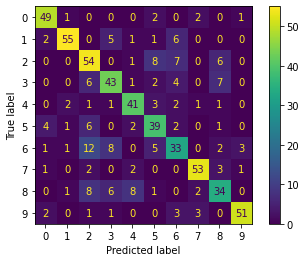

In [ ]:
matrix = confusion_matrix(y_test2, yp1)
graph = plot_confusion_matrix(lm, x_test, y_test2)
plt.show()

#### 2. One vs One

In [ ]:
model = SVC()
lm2 = OneVsOneClassifier(model)
lm2.fit(x_train, y_train2)
print("Accuracy of One vs One using sklearn")
print("------------------------------------\n")
print(lm2.score(x_test, y_test2))
yp2 = lm2.predict(x_test)

Accuracy of One vs One using sklearn
------------------------------------

0.8384491114701131


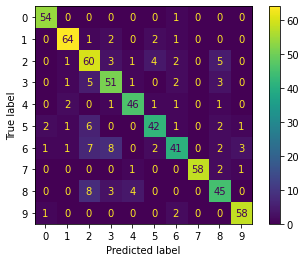

In [ ]:
matrix = confusion_matrix(y_test2, yp2)
graph = plot_confusion_matrix(lm2, x_test, y_test2)
plt.show()